In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [18]:
def distance(points, centeroids):
    """Euclidean distance"""
    #  # shape of distance returned (rows, n_clusters)
    return np.array([[np.sqrt(np.sum(row)) for row in np.power(points - center, 2)]  for center in centeroids]).T



def kmeans(points: np.ndarray, n_clusters, threshold=0.01, max_iter=20):
    """K-Mean implementation"""
    # initialize centeroids
    centeroids = np.array([np.mean(center, axis=0) for center in np.vsplit(points, n_clusters)])

    for _ in range(max_iter):
        # find the Euclidean distances between the points
        # a matrix is returned, the columns represent the clusters
        distances = distance(points, centeroids)
        #  get a vector with the index of the minimum distance in each row
        mins = np.argmin(distances, axis=1)
        # create a bin to group the elements into clusters
        bins = [[] for _ in range(n_clusters)]
        # sort elements into groups
        for i in range(points.shape[0]):
            # insert each row into the right cluster
            choice = int(mins[i])
            # each row
            value = points[i]
            bins[choice].append(value)
        # find the mean of each bin
        new_centeroids = np.array([np.mean(bin, axis=0) for bin in bins])
        t = np.abs(np.mean(np.sum((new_centeroids - centeroids), axis=1)))
        if threshold > np.abs(np.mean(np.sum((new_centeroids - centeroids), axis=1))):
            return new_centeroids, bins
        else:
            centeroids = new_centeroids
    return centeroids, bins



In [22]:
np.random.seed(43)

dimen = (100, 2)

n_clusters = 3

points = np.vstack([
            np.random.normal(0, 1, dimen),
            np.random.normal(5, 1, dimen),
            np.random.normal([2, 7], 1, dimen)
        ])

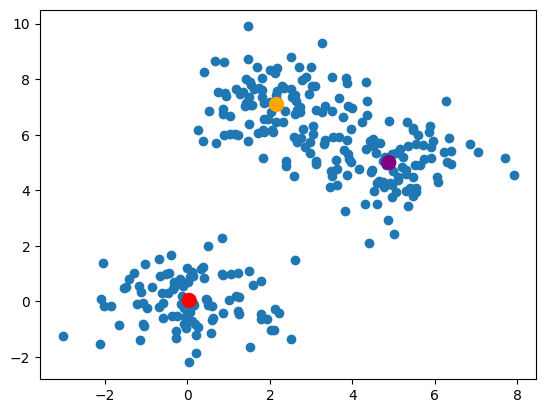

In [23]:
initial_centeroids = np.array([np.mean(center, axis=0) for center in np.vsplit(points, n_clusters)])
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(initial_centeroids[:, 0], initial_centeroids[:, 1], s=100, marker='o', c=['red', 'purple', 'orange'])
plt.show()

In [24]:
centeroids, bins = kmeans(points, n_clusters=3)
print('The coordinates of the final centers are')
print(centeroids)


The coordinates of the final centers are
[[0.04201737 0.03713427]
 [4.92400834 4.96555789]
 [2.14861839 7.1018194 ]]


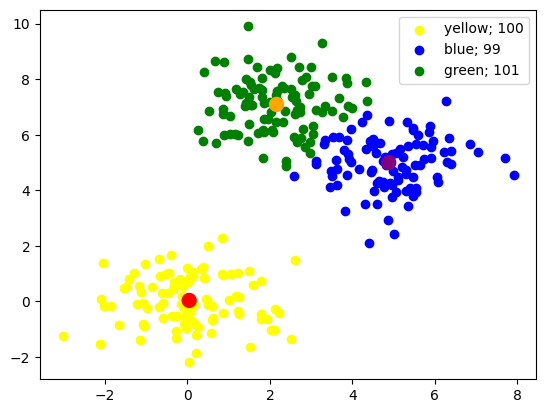

In [25]:
centeroids = np.array([np.mean(center, axis=0) for center in np.vsplit(points, n_clusters)])
colors = ['yellow', 'blue', 'green']
for bin, color in zip(bins, colors):
    b = np.array(bin)
    label = '{}; {}'.format(color,len(bin))
    plt.scatter(b[:, 0], b[:, 1], c=color, label=label)
plt.scatter(centeroids[:, 0], centeroids[:, 1], s=100, marker='o', c=['red', 'purple', 'orange'])
plt.legend()
plt.show()